# Simple Linear Regression from Scratch

- On considère le dataset `possum.csv` qui rassemble des données sur des opossums.

- Implémentez une **régression linaire** permettant de prédire la variable $Y$ `footlgth`en fonction de la variable $X$ `earconch`.

- On rappelle que le problème de minimisation et la solution associée de la régression linéaire sont donnés par:

\begin{eqnarray*}
\hat \beta_0, \hat \beta_1 & = & \underset{\beta_0, \beta_1}{\arg \min}~\mathrm{RSS} ( \beta_0, \beta_1 ) 
= \underset{\beta_0, \beta_1}{\arg \min} \sum_{i=1}^N \big( (\beta_0 + \beta_1 x_i) - y_i \big)^2 \\
\\
\hat \beta_0  = \bar y - \hat \beta_1 \bar x & ~~~~~\text{et}~~~~~ & \hat \beta_1  = \frac{\sum_{i=1}^N x_i (y_i - \bar y)}{\sum_{i=1}^N x_i (x_i - \bar x)} = \frac{\sum_{i=1}^N ( x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^N (x_i - \bar x)^2} = \frac{S_{xy}}{S_{xx}}  \\
\\
& \text{où} & \bar x = \frac{1}{N}\sum_{i=1}^N x_i ~~~\text{et}~~~ \bar y = \frac{1}{N}\sum_{i=1}^N y_i
\end{eqnarray*}

## Librairies

In [142]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data

In [143]:
dataset = pd.read_csv("data/possum.csv")

In [144]:
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Dataset

In [145]:
dataset.corr(numeric_only=True)

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716


In [146]:
X = dataset.earconch.values

In [147]:
Y = dataset.footlgth.values

In [148]:
Y = np.nan_to_num(Y, nan=np.nanmean(Y))

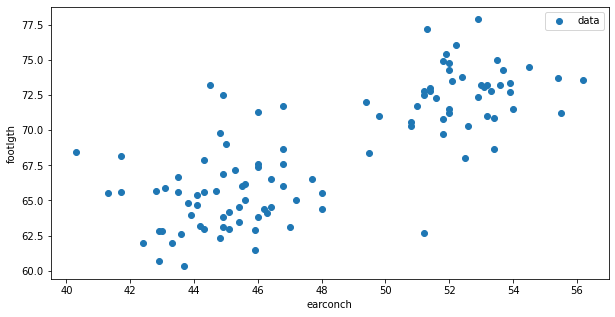

In [149]:
plt.figure(figsize=(10, 5))

plt.scatter(X, Y, label="data")

plt.xlabel("earconch")
plt.ylabel("footlgth")

plt.legend()

plt.show()

## Linear regression (from scratch)

In [150]:
x_bar = np.mean(X)
y_bar = np.mean(Y)

In [151]:
x_bar, y_bar

(48.13076923076923, 68.45922330097088)

In [152]:
num = np.sum(X * (Y - y_bar))

In [153]:
den = np.sum(X * (X - x_bar))

In [154]:
beta_1 = num / den

In [155]:
beta_1

0.8184891480057274

In [156]:
beta_0 = y_bar - beta_1*x_bar 

In [157]:
beta_0

29.064711000418292

In [158]:
def predict(x, beta_0=beta_0, beta_1=beta_1):
    return beta_0 + beta_1 * x

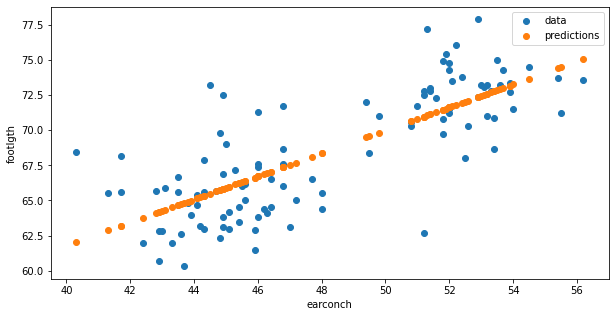

In [159]:
plt.figure(figsize=(10, 5))

plt.scatter(X, Y, label="data")
plt.scatter(X, predict(X), label="predictions")

plt.xlabel("earconch")
plt.ylabel("footlgth")

plt.legend()

plt.show()

## Linear regression (scikit-learn)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

LinearRegression()

In [162]:
Y_pred_skl = lr.predict(X.reshape(-1, 1))

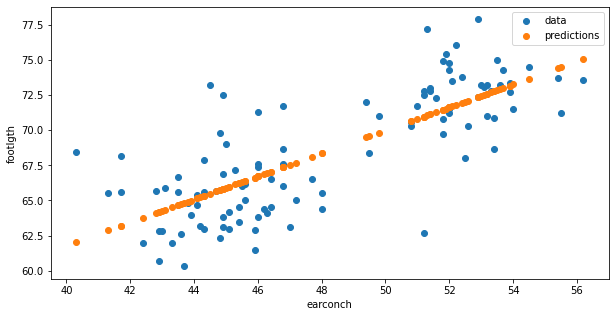

In [163]:
plt.figure(figsize=(10, 5))

plt.scatter(X, Y, label="data")
plt.scatter(X, Y_pred_skl, label="predictions")

plt.xlabel("earconch")
plt.ylabel("footlgth")

plt.legend()

plt.show()